In [1]:
# Implement the Exploration class in Home-Credit-Prediction/homecredit/cleaner.py

In [15]:

import os
import sys
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency # need this for chi-squared function

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path_dir = (os.path.dirname(os.getcwd()))
sys.path.append(path_dir)
    
from homecredit.data import HomeCredit
from homecredit.preparation import Preparation
from homecredit.cleaner import Cleaning

In [72]:

class Exploration:
    
    def __init__(self):
        # Assign an attribute ".data" to all new instances of Preparation
        #self.data = HomeCredit().get_data()['train'].copy() # good practice to be sure not to modify your `data` variable
        
        # Cleaning
        self.data = Cleaning().remove_entries()
        self.catcols = Preparation().get_catcols()
        
    def plot_correlation(self, colname):
    
        fig, ax = plt.subplots(figsize=(15, 10))
        sns.heatmap(self.data.corr(), cmap='coolwarm', annot = False, label = 'small', cbar = False)
        ax.set_title('Correlation Matrix')
        plt.show() ;
        
    def confusion_matrix(self, col1: str, col2: str, annot=False, margins=True):
        
        chisqt = pd.crosstab(self.data[col1], self.data[col2], margins=margins)
        
        plt.figure(figsize = (9, 7))
        sns.heatmap(chisqt, annot = annot,  cmap = "BuPu");
    
        return chisqt
    
    def categ_relation(self, col1, col2, margins=False):
        chisqt = pd.crosstab(self.data[col1], self.data[col2], margins=margins)
        value = chisqt.to_numpy() 
        
        ## NULL hypothesis : variables are independent of each other.
        stat, p, dof= chi2_contingency(value)[0:3]

        #print("degree of freedom", dof)

        alpha = 0.05
        #print("p value: " + str(p)) 
        if p <= alpha: 
            print('Reject NULL HYPOTHESIS : Variables are dependent of each other') 
        else: 
            print('ACCEPT NULL HYPOTHESIS : Variables are independent of each other')

        return stat, p, dof
    
    def cramers_val(self, col1, col2, margins=False): # df : dataframe
        chisqt = pd.crosstab(self.data[col1], self.data[col2], margins=margins)
        value = chisqt.to_numpy() 

        #Chi-squared test statistic, sample size, and minimum of rows and columns
        X2 = chi2_contingency(value, correction=False)[0]
        n = np.sum(value)
        minDim = min(value.shape)-1

        #calculate Cramer's V 
        V = np.sqrt((X2/n) / minDim) 

        return V
    
    # Plot of Heatmap of Cramer's V
    def plot_heatmapCramerV(self):
        L = len(self.catcols)
        cramers_outputs = np.zeros((L,L))

        for i,x in enumerate(self.catcols):
            for j,y in enumerate(self.catcols):
                result = round(self.cramers_val(x,y,margins=False),4)
                cramers_outputs[i,j] = result
                
        fig = plt.figure(figsize = (8, 8))  # instanciate figure for heat map
        ax = sns.heatmap(cramers_outputs, annot = True,  cmap = "BuPu", fmt=".0%", cbar = False)
        ax.set_xticklabels(self.catcols)
        ax.set_yticklabels(self.catcols)
        ax.tick_params(axis = 'x', labelrotation = 90)
        ax.tick_params(axis = 'y', labelrotation = 0)
        ax.set_title("Heatmap of Cramer's V on categorical variables");


   

In [73]:
exp = Exploration()

In [74]:
exp.data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
exp.data.shape

(252131, 122)

In [76]:
exp.categ_relation(col1="CODE_GENDER", col2="NAME_CONTRACT_TYPE")

Reject NULL HYPOTHESIS : Variables are dependent of each other


(112.43663999343578, 2.866815485333395e-26, 1)

In [77]:
exp.cramers_val(col1="CODE_GENDER", col2="NAME_CONTRACT_TYPE")

0.021130896772437454

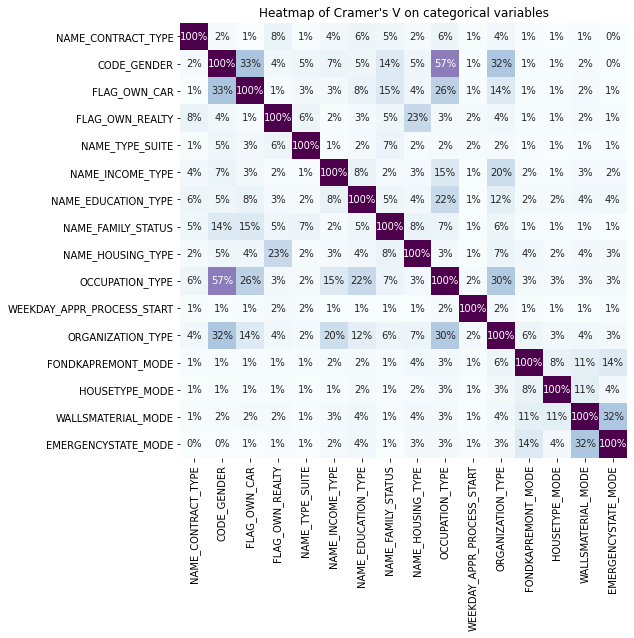

In [78]:
exp.plot_heatmapCramerV()